# DỰ ĐOÁN GIÁ XE HƠI - HỒI QUY TUYẾN TÍNH
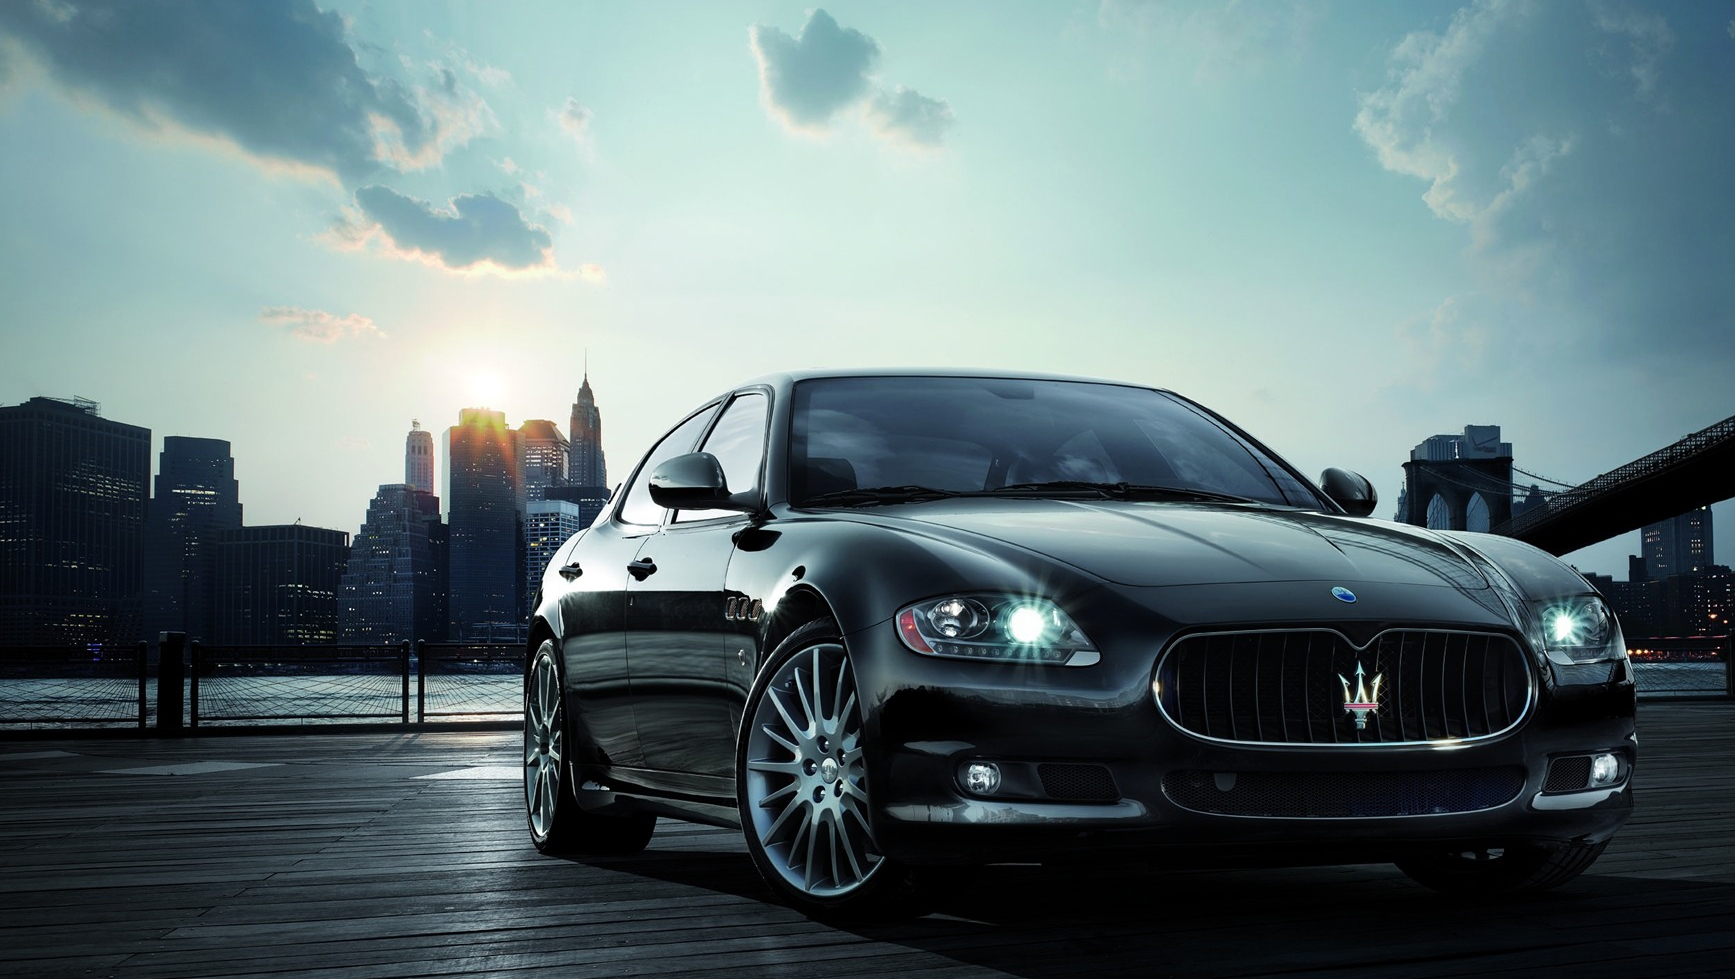

## Vấn đề cần phân tích
Công ty ô tô Geely Auto tại Trung Quốc có tham vọng muốn thâm nhập vào thì trường trường Mỹ bằng cách thành lập đơn vị sản xuất của họ ở đó. Thứ hai là sản xuất ô tô trong nước để cạnh tranh với các đối tác Mỹ và Châu Âu.
 Họ đã thuê một công ty tư vấn ô tô để giúp họ hiểu các yếu tố ảnh hưởng đến việc định giá ô tô. Họ đặc biệt quan tâm đến việc tìm hiểu về các yếu tố ảnh hưởng đến giá xe hơi ở thị trường Mỹ, vì những yếu tố này có thể khác biệt đáng kể so với ở Trung Quốc. Công ty muốn biết:
- Những biến nào quan trọng trong việc dự đoán giá của một chiếc ô tô? 
- Các biến đó mô tả giá xe tốt như thế nào?

Dựa trên các cuộc khảo sát thị trường khác nhau, công ty tư vấn đã thu thập một tập dữ liệu lớn về các loại ô tô khác nhau trên thị trường Châu Mỹ. 


## Mục tiêu hướng đến
Lập mô hình giá ô tô với các thuộc tính có sẵn. Điều này giúp chúng ta hiểu rõ về giá xe sẽ thay đổi chính xác như thế nào với từng thuộc tính của nó. Theo đó, mà công ty Geely Auto có thể thao túng thiết kế của những chiếc xe, chiến lượt kinh doanh và các yếu tố khác để đáp ứng các mức giá nhất định. Hơn nữa, mô hình này sẽ giúp công ty nắm bắt được biến động về giá của một thị trường mới.

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Bước 1: Reading and Understanding the Data

1. Đọc dữ liệu bằng cách sử dụng thư viện pandas
2. Tìm hiều về cấu trúc của dữ liệu cần phân tích

In [2]:
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Giải thích một số thuộc tính:
- symboling - Mức độ rủi ro so với giá xe của nó: -3, -2, -1, 0, 1, 2, 3.
- CarName - Tên từng loại xe: alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu,...
- fueltype - Loại nhiên liệu: diesel, gas.
- aspiration in cars - Động cơ hút khí : std, turbo.
- doornumber - Số cửa: four, two.
- carbody - Kiểu dáng xe: hardtop, wagon, sedan, hatchback, convertible.
- drivewheel - Hệ dẫn động: 4wd, fwd, rwd.
- enginelocation -  Vị trí động cơ: front, rear.
- wheelbase - Khoảng cách giữa bánh trước và sau: từ 86.6 - 120.9.
- curbweight - Trọng lượng xấp xỉ với trọng lượng thực tế
- enginetype - Loại động cơ: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
- cylindernumber - Số xi-lanh: eight, five, four, six, three, twelve, two.
- enginesize - Kích thước động cơ
- fuelsystem - Hệ thống nhiên liệu: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
- compressionratio - Tỷ lệ nén
- horsepower - Mã lực
- price - Giá

In [4]:
#Ta có 205 dòng và 26 cột
cars.shape

(205, 26)

In [5]:
#Tìm hiểu về các đặc trưng cũng như về kiểu dữ liệu của từng thuộc tính ta dùng info()
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Nhận xét: Không có giá trị nào bị thiếu
#### Loại dữ liệu: 
- String, Int, Float

#### Categorical: 
- symboling, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem 

#### Numerical
- wheelbase, length, width, height, curbweight, enginesize, bore, stroke, compressionration, horsepower, peakrpm, citympg, highwaympg, price


In [6]:
#Thay đổi kiểu dữ liệu 
features = ["fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem", "symboling"]
def convert_cat(cars, features):
    for feature in features:
        cars[feature] = cars[feature].astype("category") 
convert_cat(cars, features)

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    category
 2   CarName           205 non-null    object  
 3   fueltype          205 non-null    category
 4   aspiration        205 non-null    category
 5   doornumber        205 non-null    category
 6   carbody           205 non-null    category
 7   drivewheel        205 non-null    category
 8   enginelocation    205 non-null    category
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    category
 15  cylindernumber    205 non-null    category
 16  enginesize        205 non-

In [7]:
#Tìm hiểu về thống kê số học của các thuộc tính trên toàn bộ dữ liệu
cars.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Nhận xét
- symboling: Trung bình: 0.834, min = -2, max = 3. Nhận xét: Ta thấy được không có chiếc xe nào có mức độ rủi ro so với gia xe là tuyệt đối an toàn vì giá trị nhỏ nhất của symboling bằng -2 trong khi thực tế có mức an toàn nhất là 3.
- wheelbase: từ 86.6 - 120.9.
- length: từ 141.1 - 208.1.
- width: từ 60.3 - 72.3.
- height: từ 47.8 - 59.8.
- curbweight: từ 1488 - 4066.
- enginesize: từ 61 - 326.
- bore: từ 2.54 - 3.94.
- stroke: từ 2.07 - 4.17.
- compressionratio: từ 7 - 23.
- horsepower: từ 48 - 288.
- peakrpm: từ 4150 - 6600.
- citympg: từ 13 - 49.
- highwaympg: từ 16 - 54.
- price: từ 5118 - 45400.

In [8]:
cars.describe(include=['category'])

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,6,2,2,2,5,3,2,7,7,8
top,0,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,67,185,168,115,96,120,202,148,159,94


## Bước 2 : Data Cleaning and Preparation

Nhìn vào dữ liệu cột CarName, đọc bất kỳ một dòng trong cột ta sẽ biết được tên công ty xe và dòng xe của nó. Với mục tiêu hướng tới là phân tích giá của từng công ty xe vì thế mà ta cần tách tên công ty ra từ cột CarName để ta có thể phân loại công ty thay vì để theo tên xe như ban đầu

In [9]:
#Tách tên công ty từ cột CarName
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
# Xóa cột CarName
cars.drop(['CarName'],axis=1,inplace=True)

Cột đầu tiên là ID xe. ID cho xe chỉ là một số để xác định xe này trong bộ dữ liệu. Vì vậy nó không thực sự cần thiết là một trong những thuộc tính mà ta cần quan tâm. Chúng ta có thể loại bỏ cột này.

In [10]:
cars.drop(['car_ID'],axis=1,inplace=True)
cars.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Một số tên công ty giống nhau nhưng bị lỗi chính tả hoặc sử dụng tên thủ đô nên chúng xuất hiện dưới hai dạng. Vì thế, ta cần chỉnh sửa những lỗi đó:
- `alfa-romeo` -> `alfa-romero`
- `maxda` -> `mazda`
- `Nissan` -> `nissan`
- `porcshce`-> `porsche`
- `toyouta` -> `toyota`
-  `vw` -> `vokswagen` -> `volkswagen`

In [12]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('alfa-romero','alfa-romeo')
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Step 3: Visualizing the data


Chúng ta sẽ thực hiện trực quan hóa dữ liệu bằng cách vẽ biểu đồ distplot và boxplot

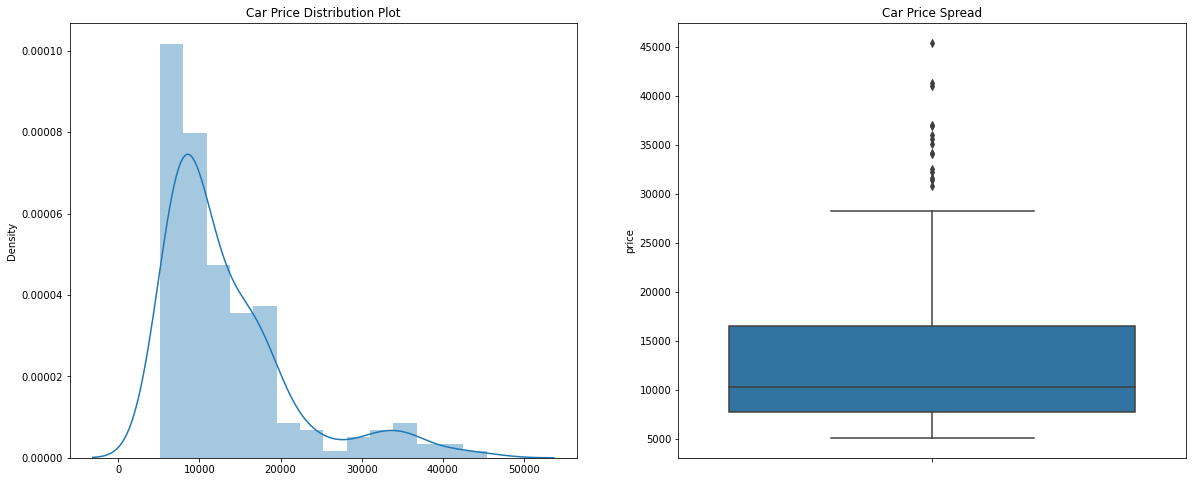

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(x=cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [14]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


#### Kết luận :

1. Biểu đồ bị lệch phải, có nghĩa là hầu hết các mức giá trong tập dữ liệu đều thấp (Dưới 15.000).
2. Có sự khác biệt đáng kể giữa giá trị trung bình và giá trị trung vị của phân phối giá.
3. Các điểm dữ liệu chênh lệch xa so với mức trung bình, điều này cho thấy giá xe có sự chênh lệch cao (85% giá dưới 18.500, trong khi 15% còn lại nằm trong khoảng 18.500 đến 45.400).
4. Xe có giá thành càng thấp thì chiếm tỉ lệ càng lớn.

## Notes:
(1) Từ biểu đồ histogram: median < mean => biểu đồ bị lệch phải => hầu hết các mức giá trong tập dữ liệu đều thấp
(2) Từ biểu đồ boxplot: vì xuất hiện các giá trị ngoại lai lớn (>40000) làm cho giá trị trung bình bị ảnh hưởng => giá trị trung bình lớn hơn trung vị.

#### Step 3.1 : Trực quan hóa dữ liệu phân loại

    - CompanyName
    - Symboling
    - fueltype
    - enginetype
    - carbody
    - doornumber
    - enginelocation
    - fuelsystem
    - cylindernumber
    - aspiration
    - drivewheel
## 

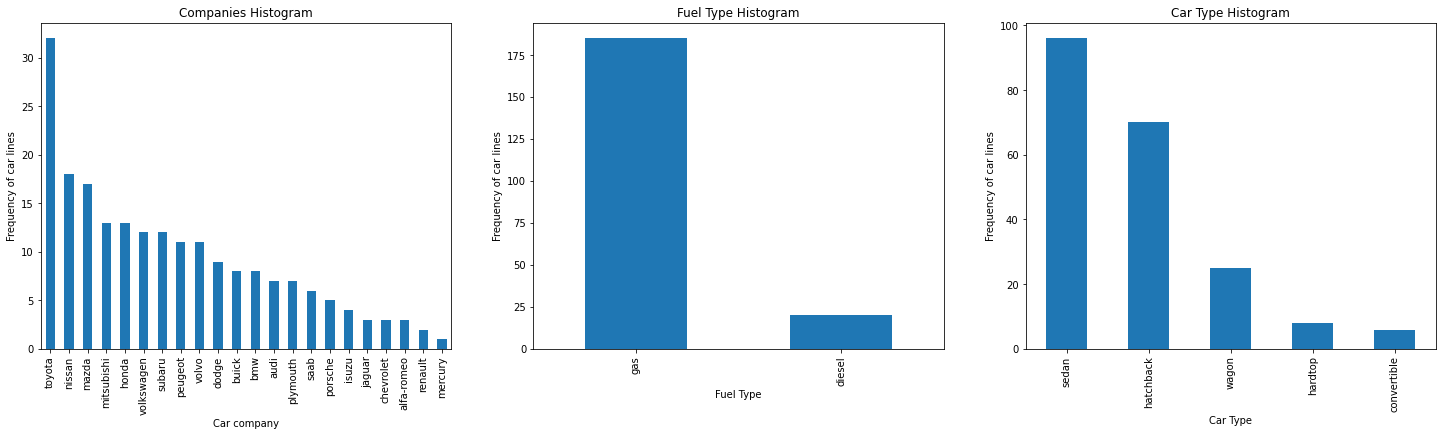

In [74]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind = 'bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of car lines')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of car lines')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of car lines')

plt.show()

#### Kết luận :

1. `Toyota` là công ty chiếm nhiều sự yêu thích nhất.
2. Số lượng ô tô chạy bằng nhiên liệu xăng nhiều hơn lượng ô tô chạy bằng nhiên liệu dâu diesel.
3. `sedan` là loại xe được ưa chuộng hàng đầu.

## Notes:
(1):
+ Thương hiệu này là dòng xe có chất lượng đảm bảo và ít hỏng hóc nhất sau 5 năm sử dụng. Có thể thấy được rằng người Hoa Kỳ khi mua xe, thứ họ quan tâm nhiều hơn là chất lượng và tỷ lệ hiệu suất giá của xe.
(2):

(3):


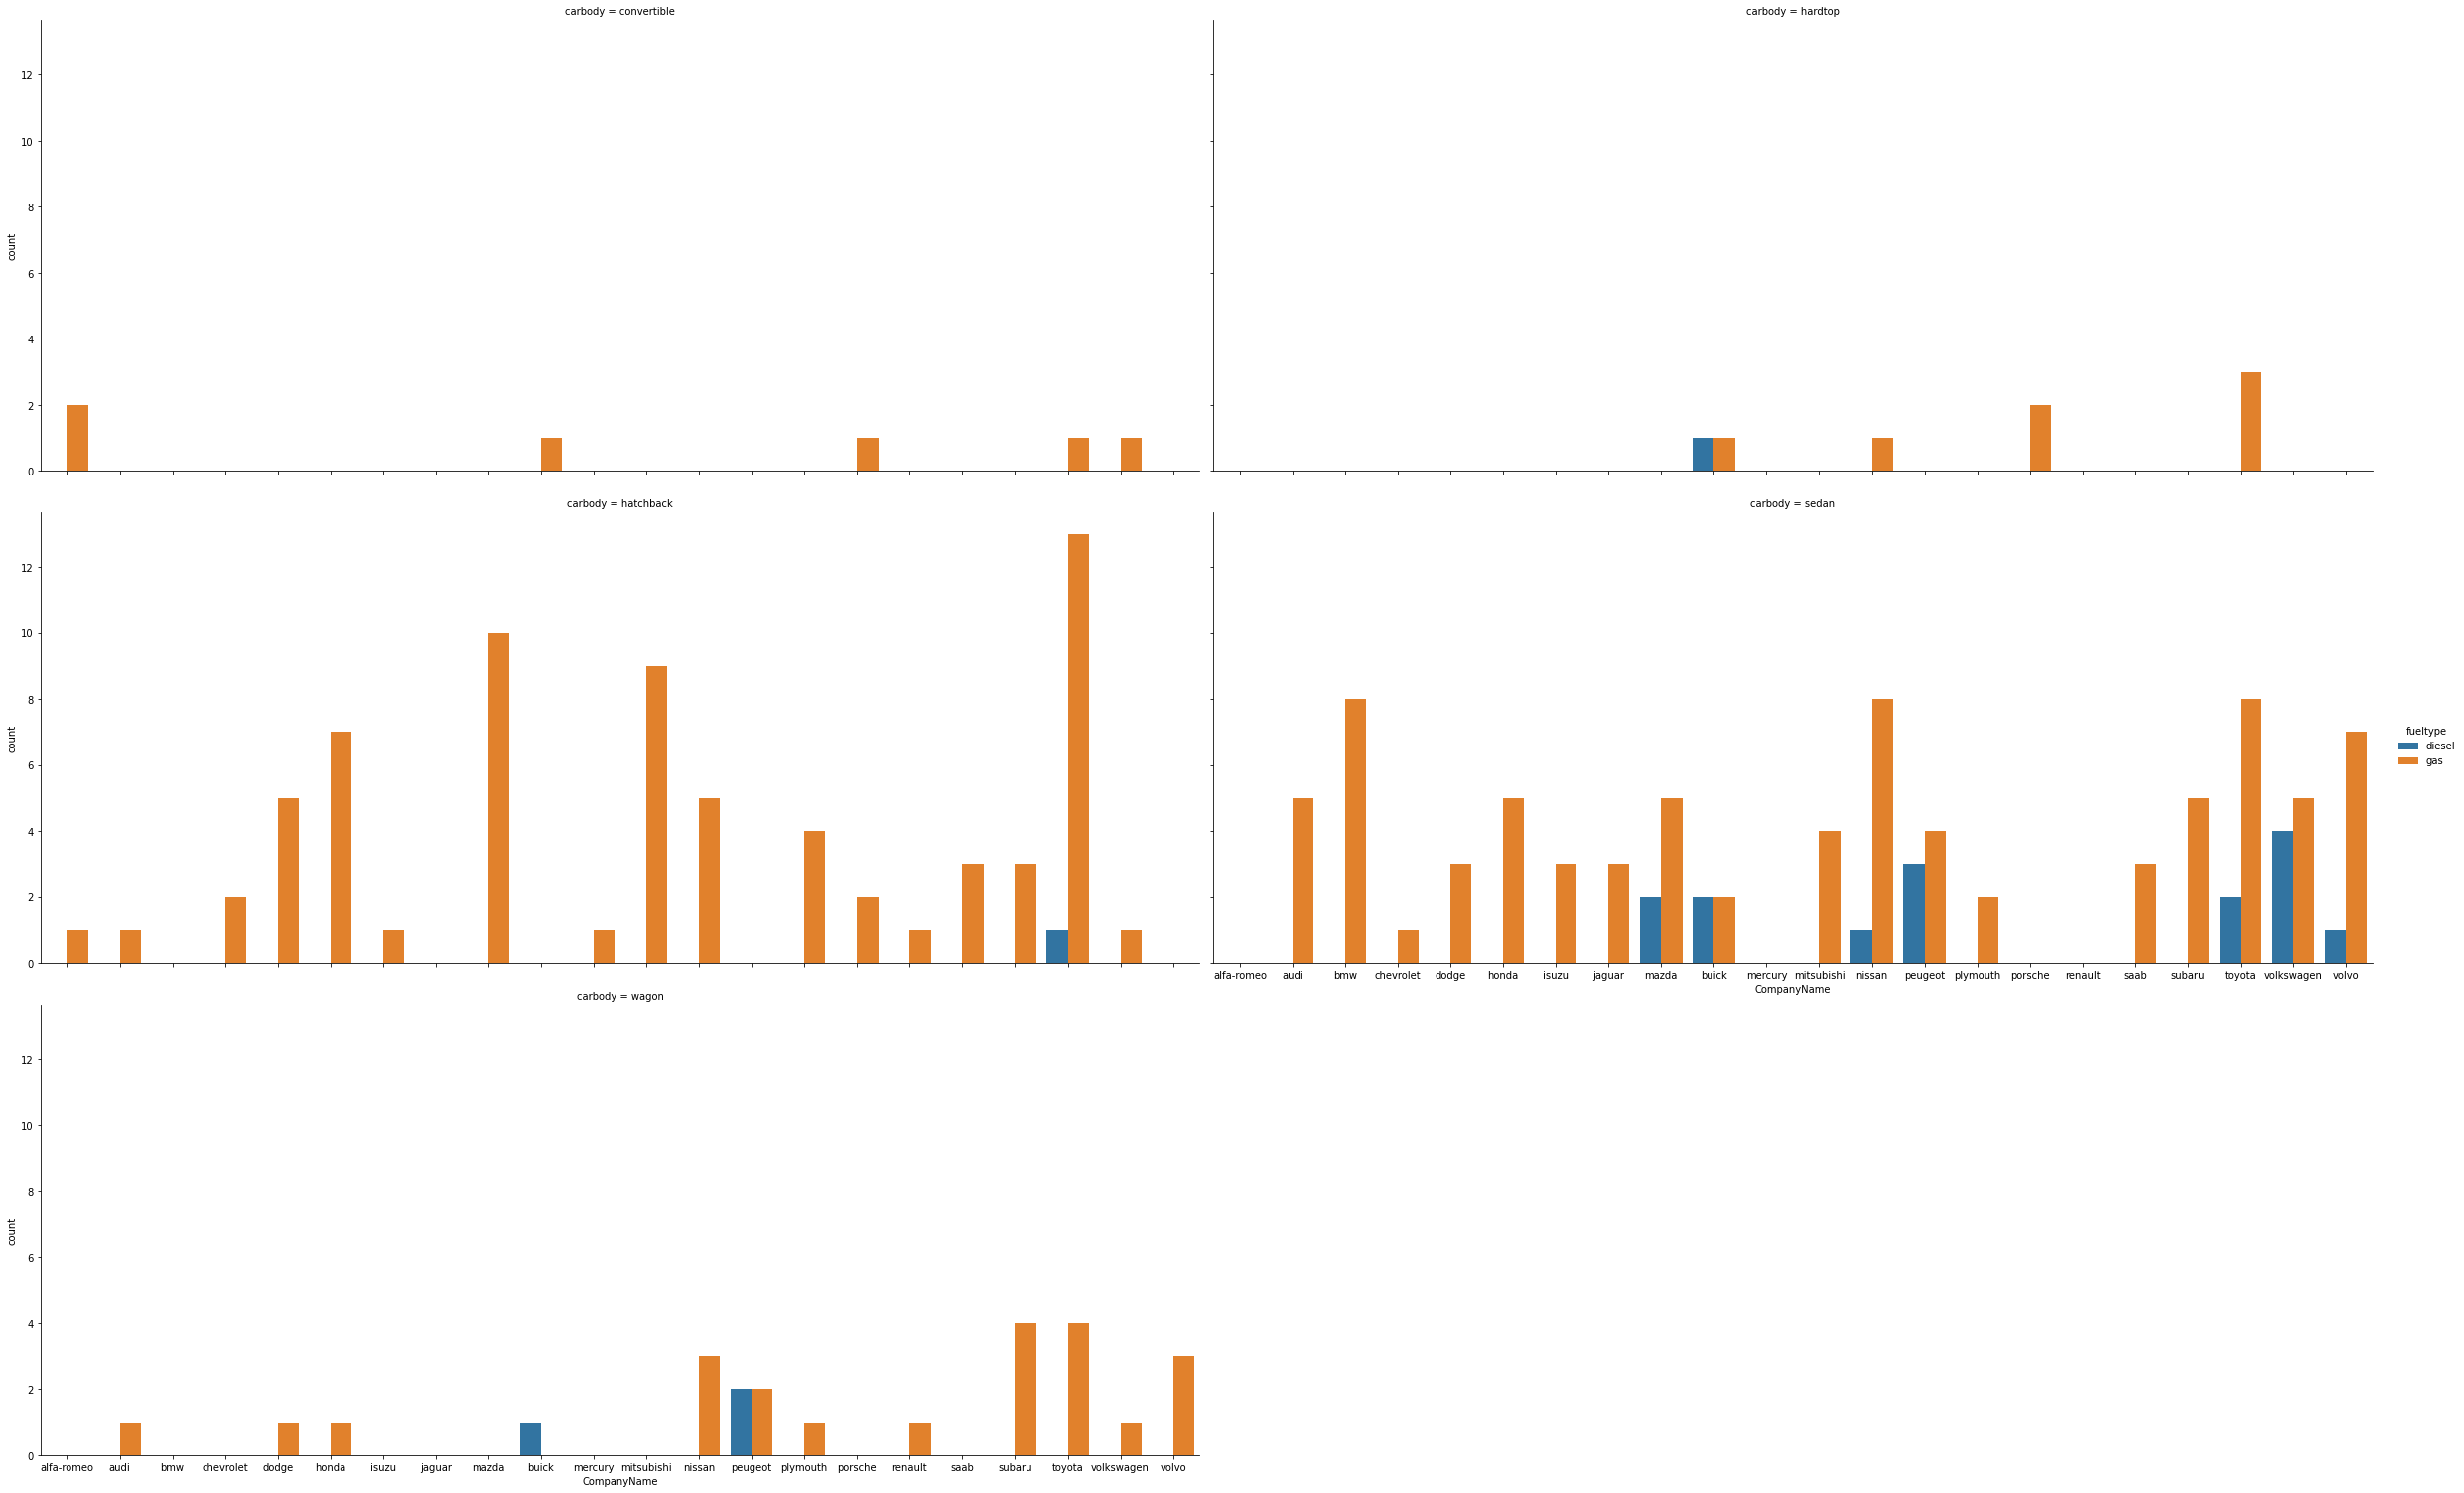

In [150]:

ctp = sns.catplot(data=cars, x= 'CompanyName',col_wrap=2, hue ='fueltype', col='carbody' , kind='count', height=7, aspect=2.4 )

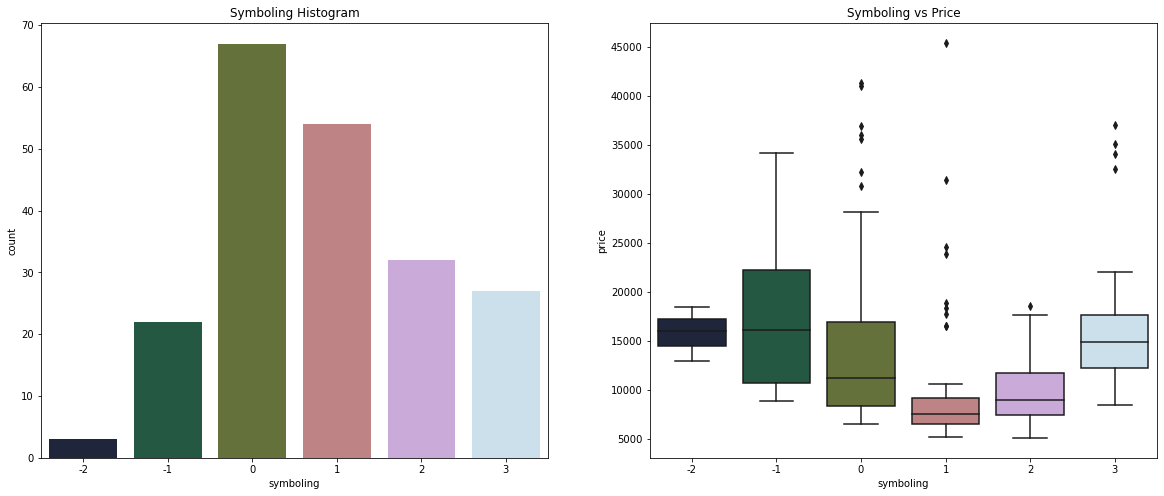

In [76]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

#### Kết luận:

1. Có vẻ như ký hiệu với các giá trị `0` và` 1` có số lượng hàng cao (tức là chúng được bán nhiều nhất).
2. Những chiếc xe có ký hiệu `-1` dường như có giá cao (vì nó cũng có lý, xếp hạng rủi ro bảo hiểm -1 là khá tốt). Nhưng có vẻ như ký hiệu với giá trị `3` có phạm vi giá tương tự như giá trị` -2`. Có một sự giảm giá ở ký hiệu `1`.

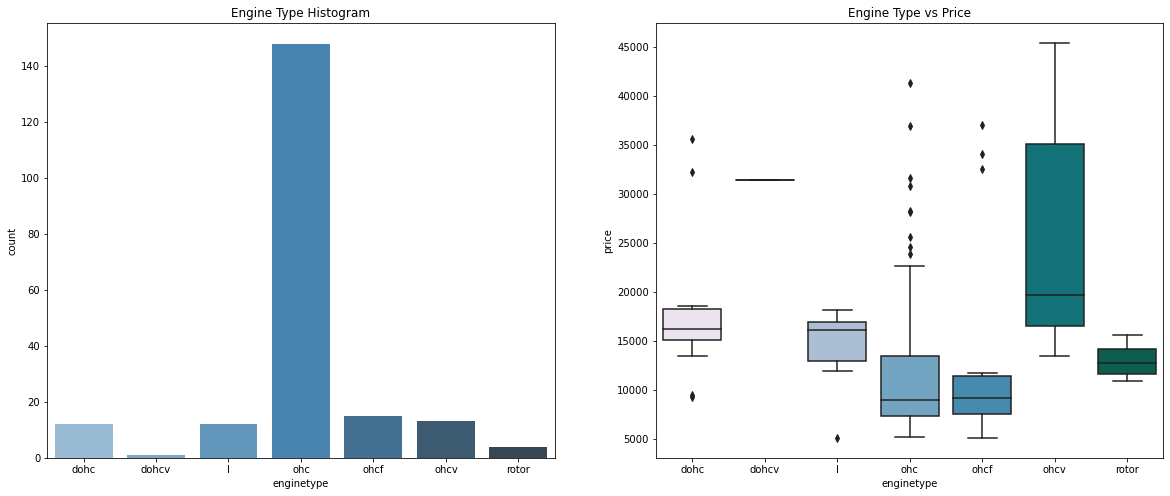

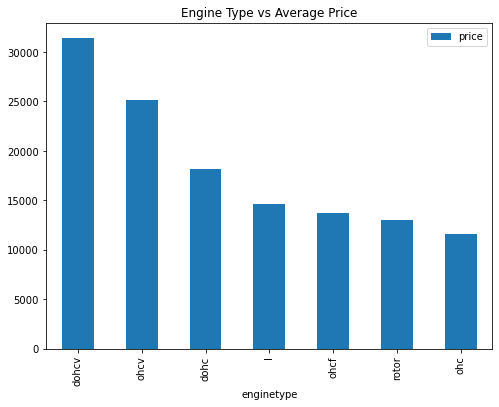

In [17]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()


#### Inference :

1. `ohc` Engine type seems to be most favored type.
2. `ohcv` has the highest price range (While `dohcv` has only one row), `ohc` and `ohcf` have the low price range.

<Figure size 1800x432 with 0 Axes>

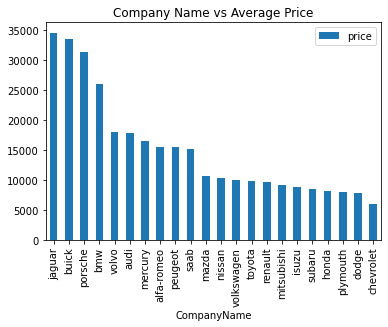

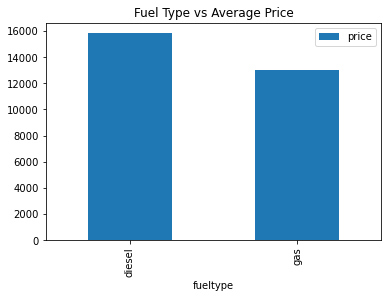

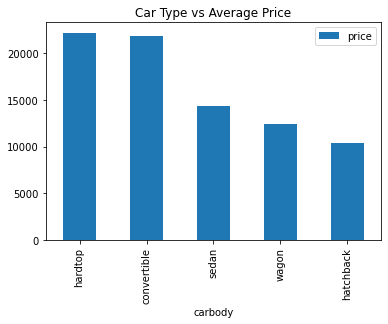

In [18]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

#### Inference :

1. `Jaguar` and `Buick` seem to have highest average price.
2. `diesel` has higher average price than  gas.
3. `hardtop` and `convertible` have higher average price.

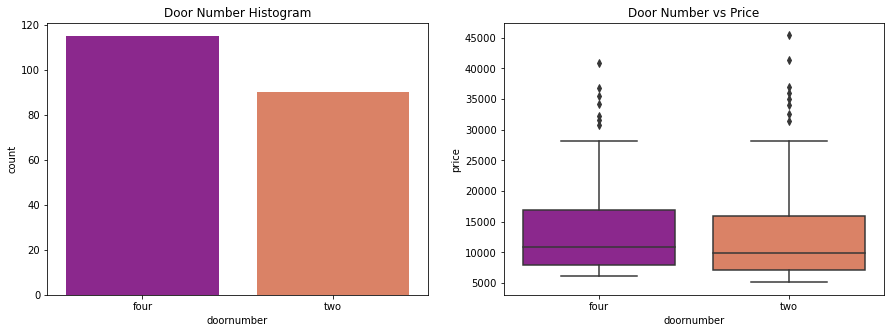

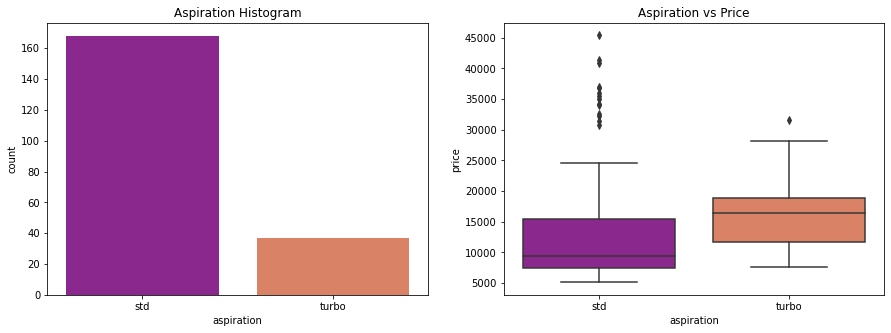

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()


#### Inference :

1. `doornumber` variable is not affacting the price much. There is no sugnificant difference between the categories in it.
2. It seems aspiration with `turbo` have higher price range than the `std`(though it has some high values outside the whiskers.)

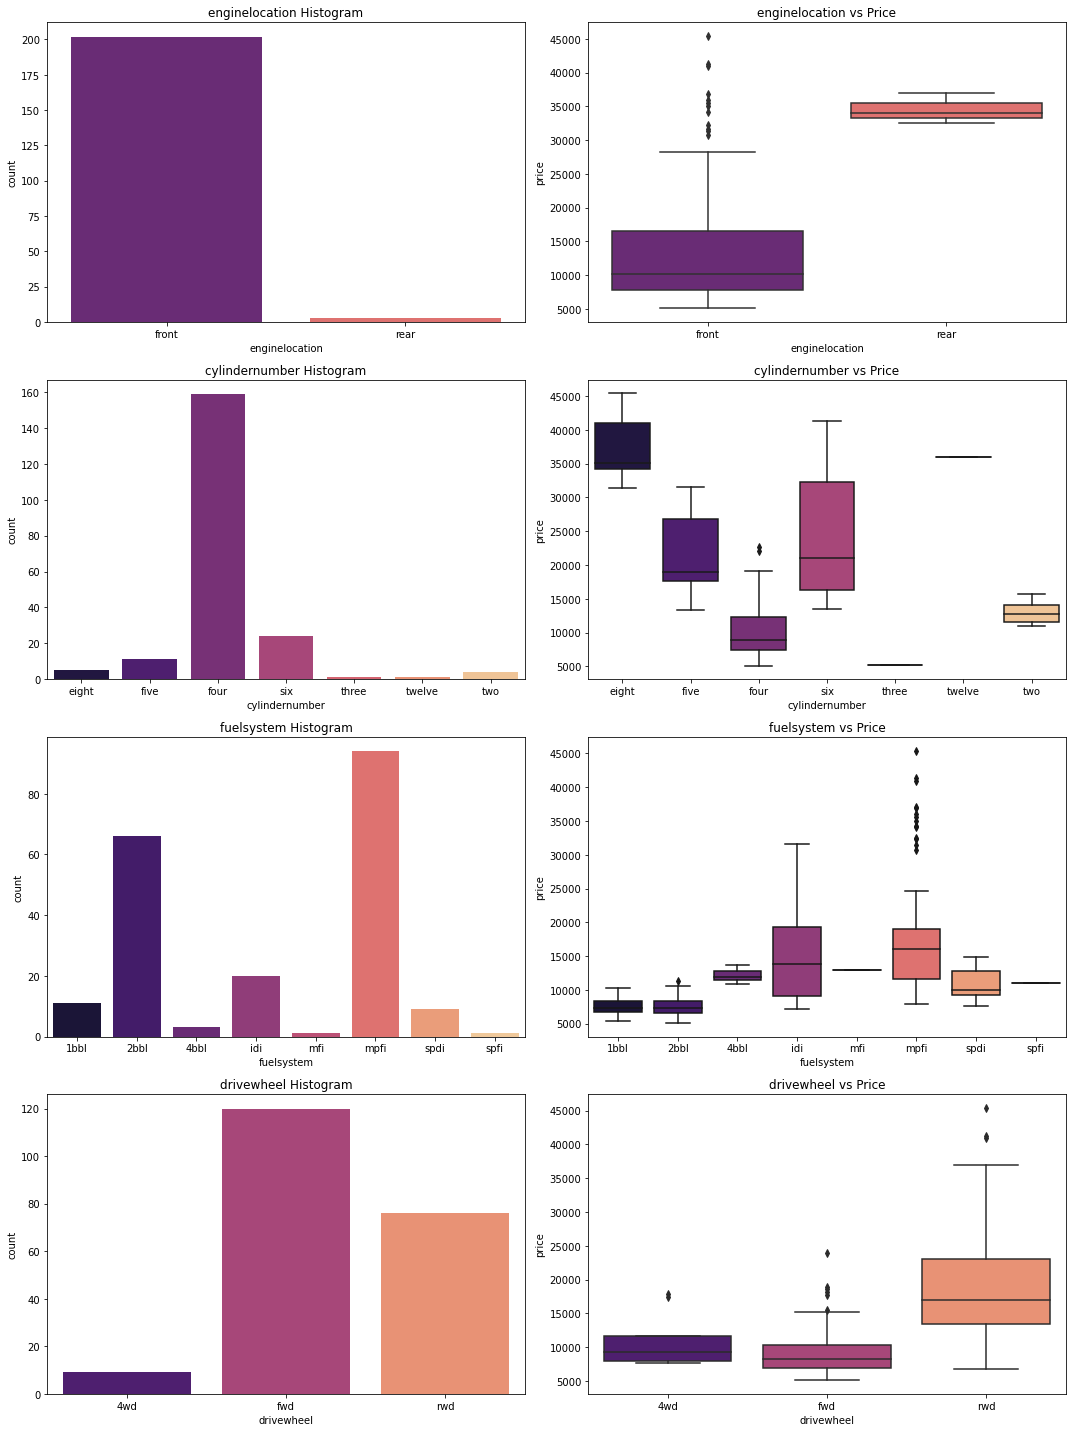

In [20]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

#### Inference :

1. Very few datapoints for `enginelocation` categories to make an inference.
2. Most common number of cylinders are `four`, `six` and `five`. Though `eight` cylinders have the highest price range.
3. `mpfi` and `2bbl` are most common type of fuel systems. `mpfi` and `idi` having the highest price range. But there are few data for other categories to derive any meaningful inference
4. A very significant difference in drivewheel category. Most high ranged cars seeme to prefer `rwd` drivewheel.

#### Step 3.2 : Visualising numerical data

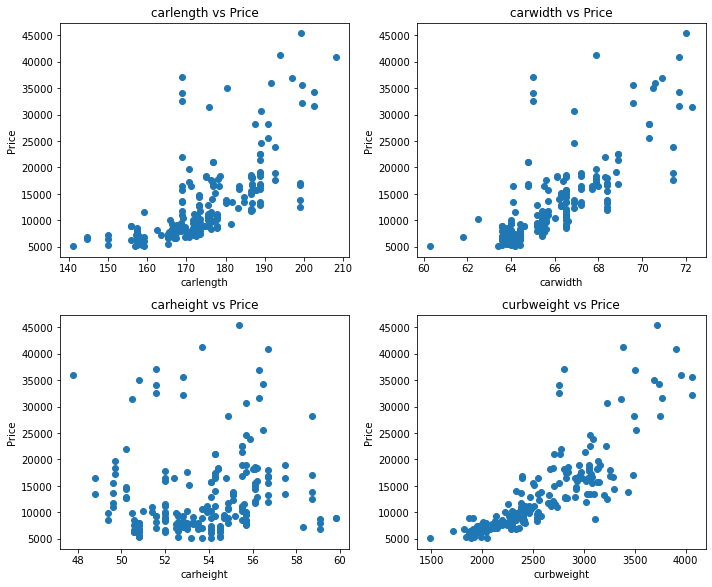

In [21]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

#### Inference :

1. `carwidth`, `carlength` and `curbweight` seems to have a poitive correlation with `price`. 
2. `carheight` doesn't show any significant trend with price.

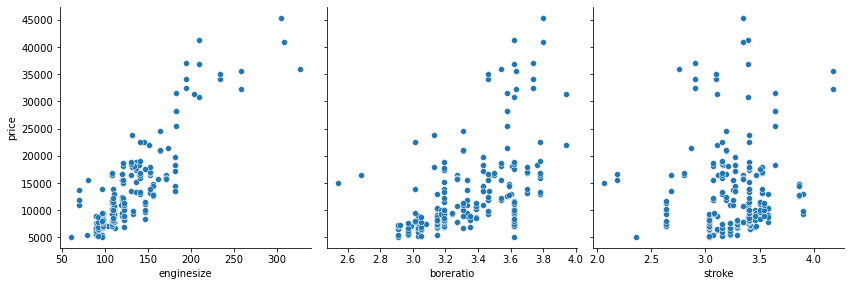

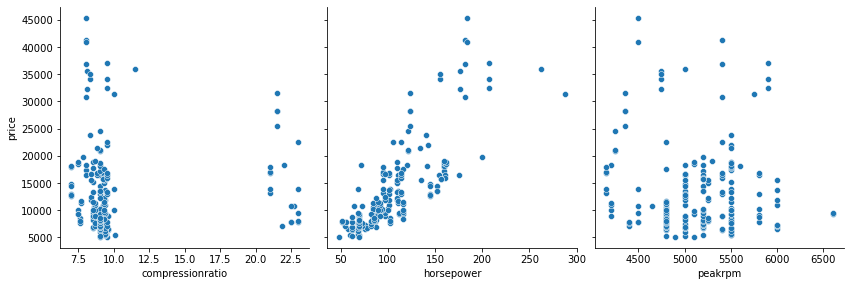

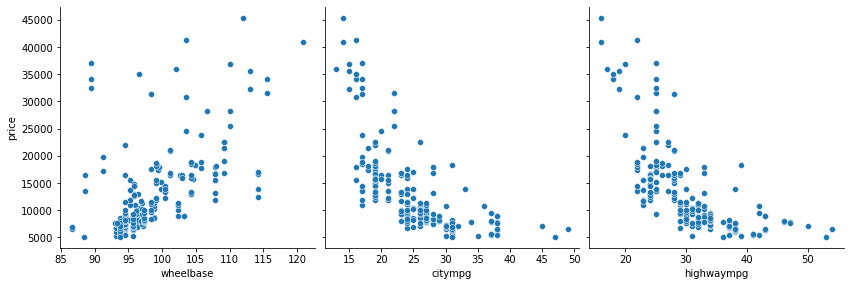

In [22]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

#### Inference :

1. `enginesize`, `boreratio`, `horsepower`, `wheelbase` - seem to have a significant positive correlation with price.
2. `citympg`, `highwaympg` - seem to have a significant negative correlation with price.

In [23]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.841118268481846

### Step 4 : Deriving new features

In [24]:
#Fuel economy
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [25]:
#Binning the Car Companies based on avg prices of each Company.
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


### Step 5 : Bivariate Analysis

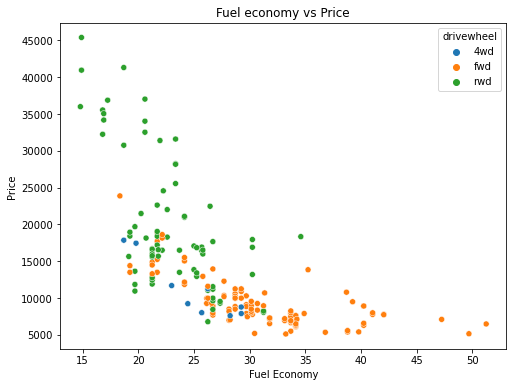

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

#### Inference :

1. `fueleconomy` has an obvios `negative correlation` with price and is significant.

<Figure size 1800x432 with 0 Axes>

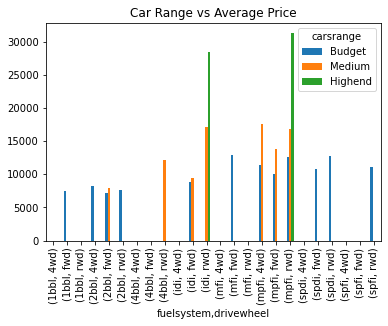

In [27]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

#### Inference :

1. High ranged cars prefer `rwd` drivewheel with `idi` or `mpfi` fuelsystem.

### List of significant variables after Visual analysis :

    - Car Range 
    - Engine Type 
    - Fuel type 
    - Car Body 
    - Aspiration 
    - Cylinder Number 
    - Drivewheel 
    - Curbweight 
    - Car Length
    - Car width
    - Engine Size 
    - Boreratio 
    - Horse Power 
    - Wheel base 
    - Fuel Economy 

In [28]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


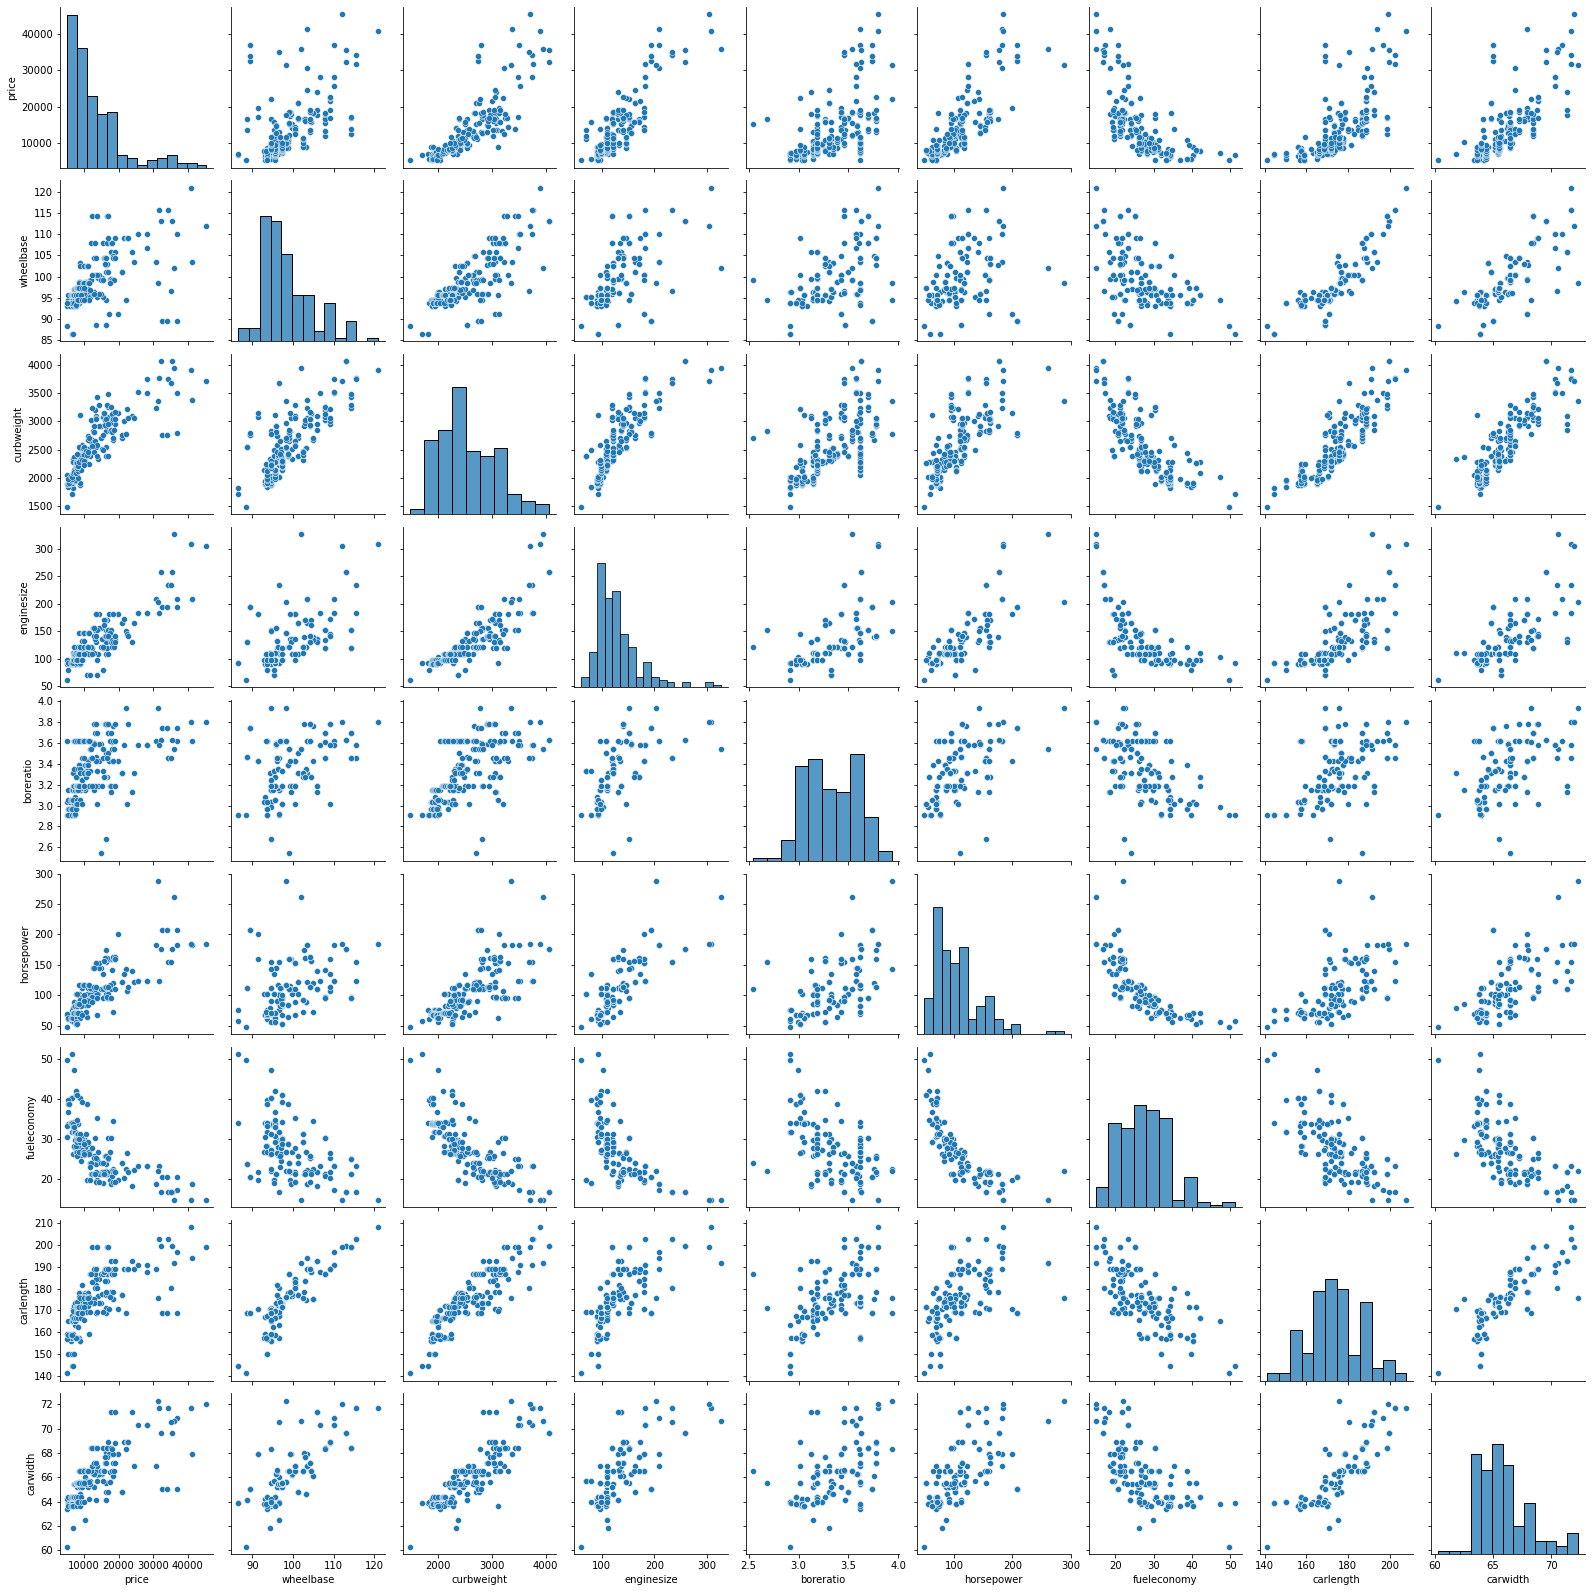

In [29]:
sns.pairplot(cars_lr)
plt.show()

### Step 6 : Dummy Variables

In [30]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [31]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [32]:
cars_lr.shape

(205, 31)

### Step 7 : Train-Test Split and feature scaling

In [33]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,...,0,0,0,1,0,0,0,0,1,0


In [36]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


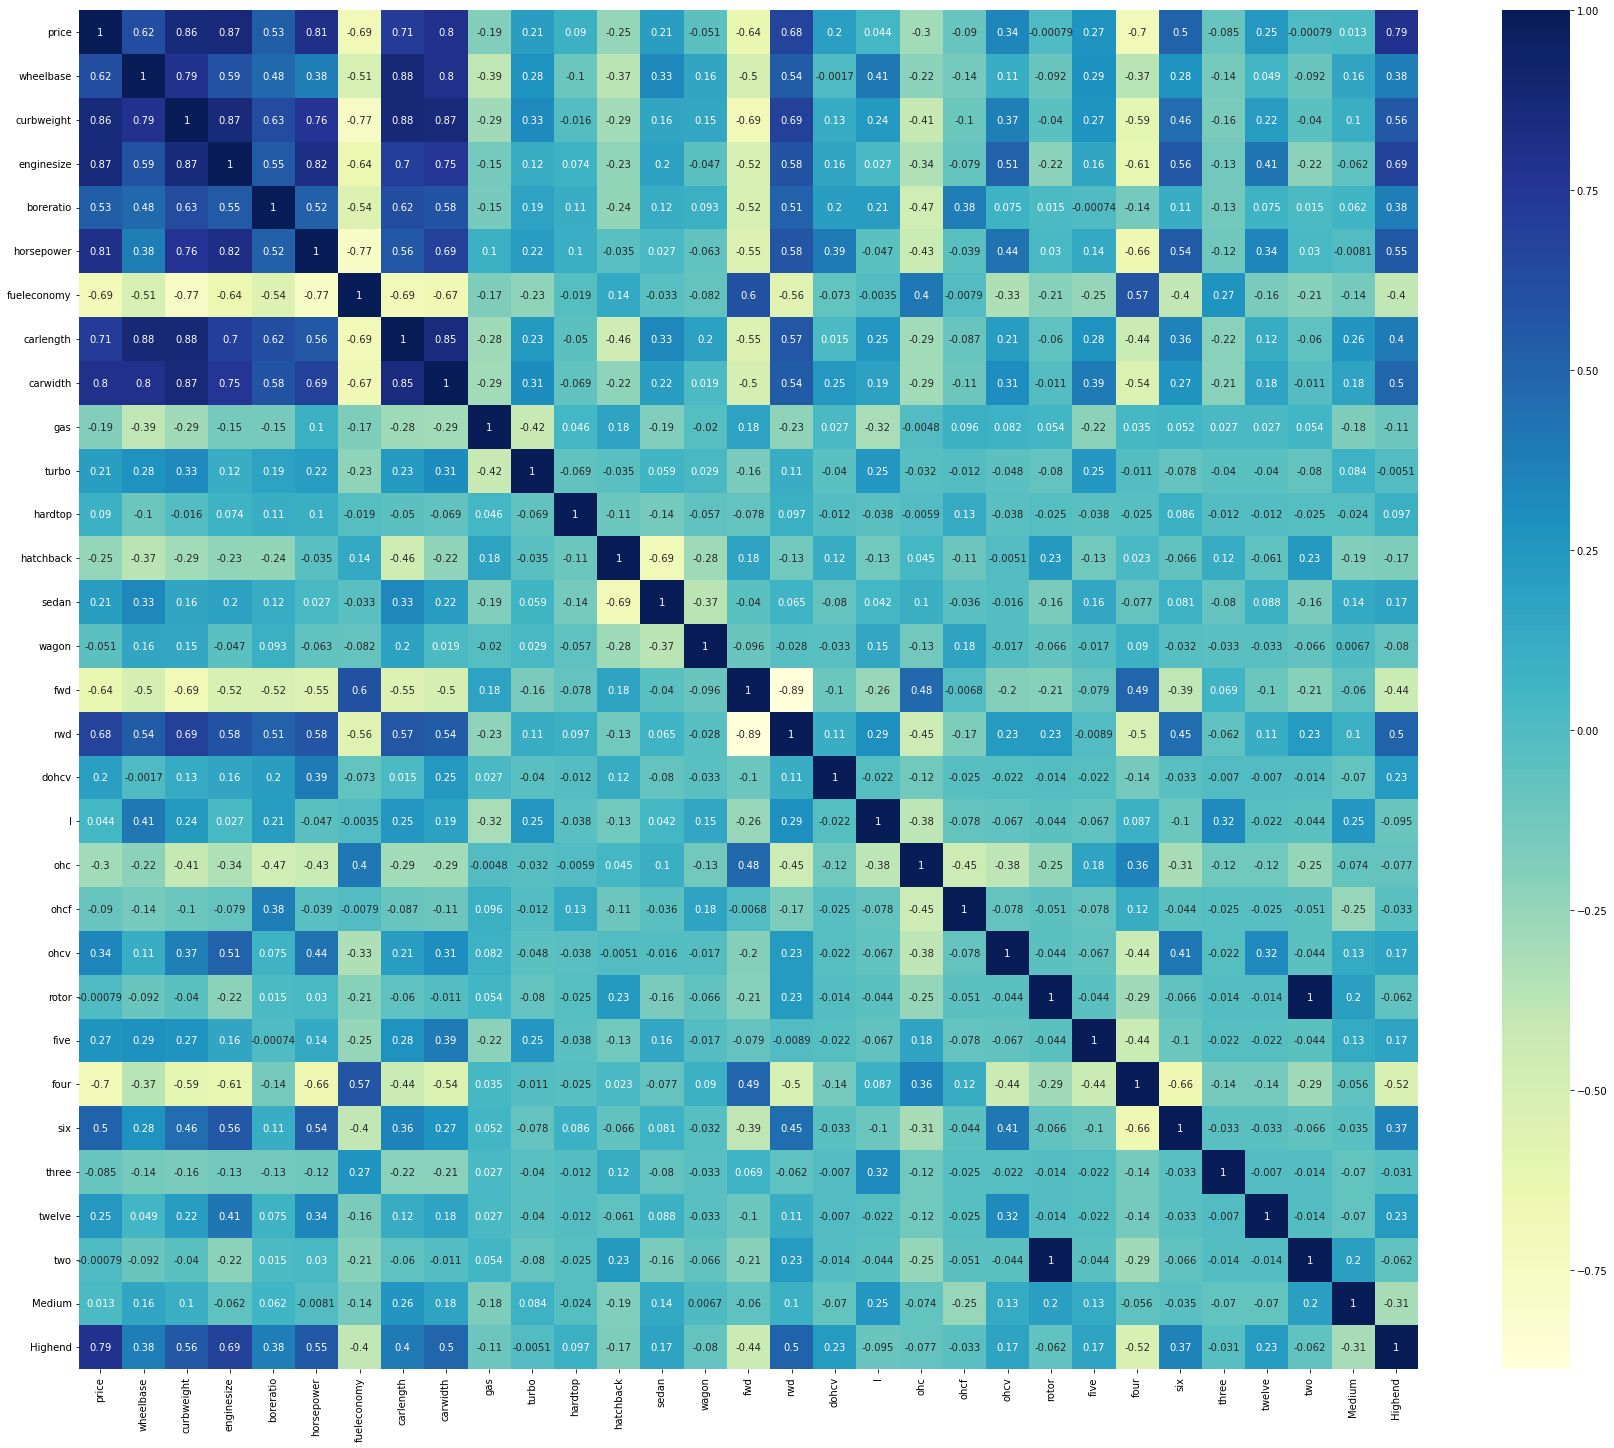

In [37]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Highly correlated variables to price are - `curbweight`, `enginesize`, `horsepower`,`carwidth` and `highend`.

In [38]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

### Step 8 : Model Building

In [39]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 21),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 20),
 ('Medium', False, 12),
 ('Highend', True, 1)]

In [42]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [43]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0


In [44]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### MODEL 1

In [45]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           1.29e-70
Time:                        17:33:18   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0947      0.042     -2.243      

p-vale of `twelve` seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [46]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

#### MODEL 2

In [47]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           4.25e-71
Time:                        17:33:18   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0764      0.041     -1.851      

In [48]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

#### MODEL 3

In [49]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           7.85e-72
Time:                        17:33:18   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [50]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,Highend,1.63
7,dohcv,1.46


dropping `curbweight` because of high VIF value. (shows that curbweight has high multicollinearity.)

In [51]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

#### MODEL 4


In [52]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           4.70e-70
Time:                        17:33:19   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [53]:
checkVIF(X_train_new)

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,Highend,1.56
6,dohcv,1.21


dropping `sedan` because of high VIF value.

In [54]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

#### MODEL 5

In [55]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           1.68e-69
Time:                        17:33:19   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [56]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.82
1,horsepower,2.39
2,carwidth,2.09
6,Highend,1.55
3,hatchback,1.23
5,dohcv,1.21
4,wagon,1.11


dropping `wagon` because of high p-value.

In [57]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

#### MODEL 6

In [58]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           1.57e-70
Time:                        17:33:19   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [59]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,Highend,1.53
4,dohcv,1.21
3,hatchback,1.13


#### MODEL 7

In [60]:
#Dropping dohcv to see the changes in model statistics
X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           1.04e-67
Time:                        17:33:19   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

,Features,VIF
0,const,10.04
1,horsepower,2.22
2,carwidth,2.08
4,Highend,1.53
3,hatchback,1.10


### Step 9 : Residual Analysis of Model

In [61]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

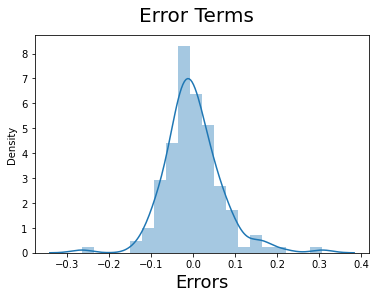

In [62]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

### Step 10 : Prediction and Evaluation

In [63]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [64]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [65]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [66]:
# Making predictions
y_pred = lm.predict(X_test_new)

#### Evaluation of test via comparison of y_pred and y_test

In [67]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8614595209022035

Text(0, 0.5, 'y_pred')

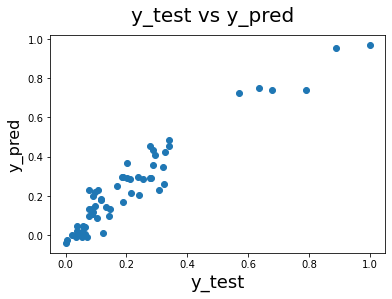

In [68]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

#### Evaluation of the model using Statistics

In [69]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           1.04e-67
Time:                        17:33:20   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

#### Inference :

1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.899 and 0.896 - `90%` variance explained.
2. *F-stats and Prob(F-stats) (overall model fit)* - 308.0 and 1.04e-67(approx. 0.0) - Model fir is significant and explained `90%` variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.